# Pandas를 활용한 Iris 데이터 분석

* 제출일 : 2023년 9월 15일

## 작업 수행 내용
1. df.shape : 배열 모양 출력
2. df.head(n) : 배열 앞 n개 출력
3. df.info() : 배열 정보 출력
4. df.rename() : 행, 열 이름 재정의
5. df.sort_values() : 행, 열의 값으로 정렬
6. df.loc() : 배열 슬라이싱
7. pd.cut(df["col"]) : 배열 데이터 구간화
8. pd.get_dummies() : one-hot encoding
9. df.query() : query 함수
10. plt.plot() : 선 그래프 생성
11. plt.show() : 그래프 출력
12. plt.scatter() : 산점도 그래프 생성
13. fig.add_subplot() / ax.scatter() : 3D 산점도 그래프 생성
14. plt.hist() : histogram 그래프 생성
15. sns.scatterplot() : seaborn 산점도 그래프 생성

## 필수 작업 내용
* 그래프 개수 : 2개
* one-hot encoding : Species 적용

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Iris.csv", encoding = "cp949")

df.info()
print(df.shape)
print(df.head(3))
print(df.rename(columns={"Species":"Classification"}))
print(df.sort_values(by=["SepalLengthCm"], ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
(150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9  

In [2]:
#binning with PetalLengthCm
print("\n==== binning with PetalLengthCm ====\n")
df["PetalLengthGrade"] = pd.cut(df["PetalLengthCm"], bins=[0, 3, 5, 7], labels=["C", "B", "A"])
print(df)

#slicing - deleted Id and PetalLengthGrage
print("\n==== slicing - deleted Id and PetalLengthGrage ====\n")
df = df.loc[:, "SepalLengthCm":"Species"]
print(df)


==== binning with PetalLengthCm ====

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species PetalLengthGrade  
0       Iris-setosa                C  
1       Iris-setosa                C  
2  

In [3]:
#one-hot encoding - Species
print("\n==== one-hot encoding - Species ====\n")
df = pd.get_dummies(df, columns=["Species"], dtype=int) #one-hot endcoding
print(df)

#query function
print("\n==== query function ====\n")
print(df.query("SepalWidthCm >= 3.0 and PetalLengthCm >= 3.0"))


==== one-hot encoding - Species ====

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0              5.1           3.5            1.4           0.2  \
1              4.9           3.0            1.4           0.2   
2              4.7           3.2            1.3           0.2   
3              4.6           3.1            1.5           0.2   
4              5.0           3.6            1.4           0.2   
..             ...           ...            ...           ...   
145            6.7           3.0            5.2           2.3   
146            6.3           2.5            5.0           1.9   
147            6.5           3.0            5.2           2.0   
148            6.2           3.4            5.4           2.3   
149            5.9           3.0            5.1           1.8   

     Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                      1                        0                       0  
1                      1    

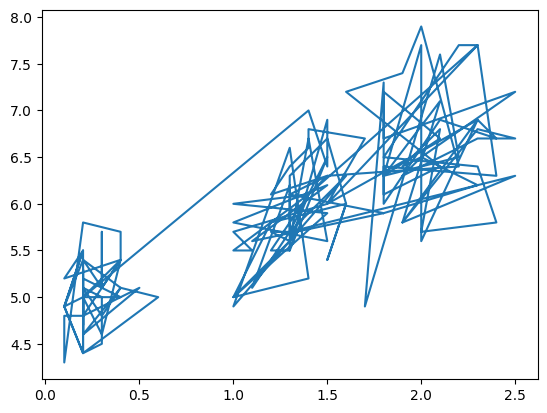

In [4]:
x1 = df.loc[:, "PetalWidthCm"]
y1 = df.loc[:, "SepalLengthCm"]

#matplotlib
#line plot
plt.plot(x1, y1)
plt.show()

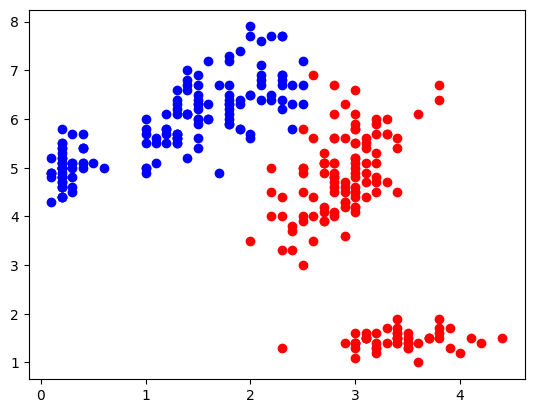

In [5]:
x2 = df.loc[:, "SepalWidthCm"]
y2 = df.loc[:, "PetalLengthCm"]

#산점도
plt.scatter(x1, y1, color="blue")
plt.scatter(x2, y2, color="red")
plt.show()

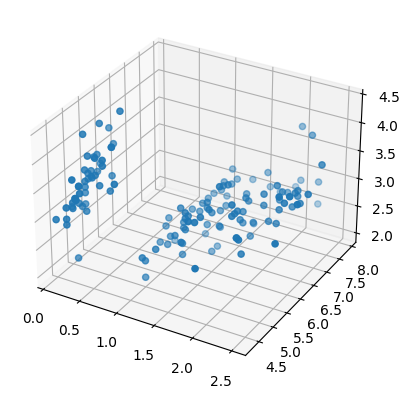

In [6]:
#3d 산점도
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x1, y1, x2)
plt.show()

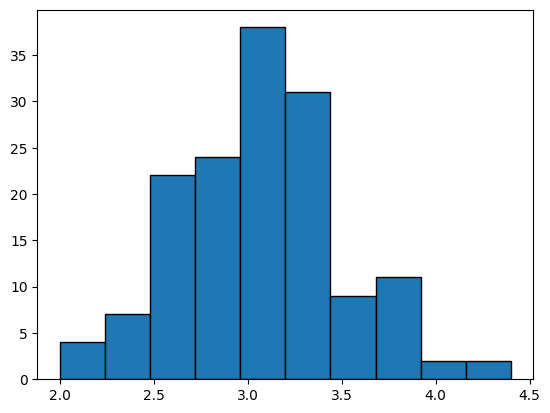

In [7]:
#histogram

plt.rcParams['axes.unicode_minus'] = False
plt.hist(x2, edgecolor="black")
plt.show()

<Axes: ylabel='SepalLengthCm'>

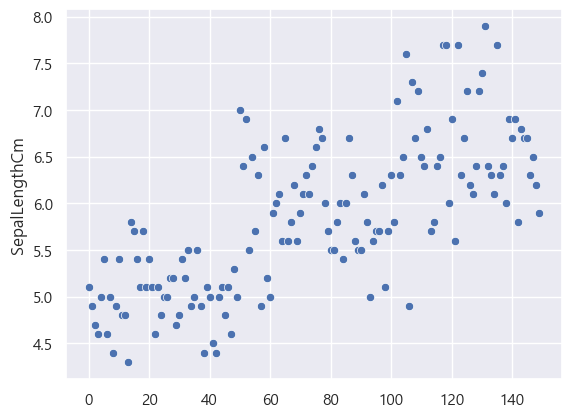

In [8]:
#seaborn scatter
sns.set_theme(font="Malgun Gothic")
sns.scatterplot(data=df.loc[:, "SepalLengthCm"])